# Codi queries

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import lithops
from lithops import Storage
from wordcloud import WordCloud
import csv
import pandas as pd
import sys
from io import StringIO
!{sys.executable} -m pip install fsspec

config = {'lithops' : {'storage' : 'ibm_cos',    'storage_bucket' : 'XXXXX'}
,
          'ibm_cos': {'region': 'XXXXXXXX', 'api_key': 'XXXXXXX'}}
        


storage = Storage(config=config)  # this will create an ibm_cos Storage instance
numhash=0
hashdict={}

obj=storage.get_object('tweetbucket0135711' , 'astrazeneca.csv')
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
    
    
def obtenirStringHashtags(obj):    
    global numhash
    global hashdict
    arguments=' '
    a=obj.decode('utf-8')
    df=pd.read_csv(StringIO(a) )
    
    for line in df.itertuples():
        result=''
        result=str(line.hastags)
        result2=result.split(',')
        for i in (result2 ):
            if(i!='' and i!='nan'):
                arguments=arguments+' '+i
                numhash=numhash+1
                try:
                    hashdict[i] += 1
                except KeyError:
                    hashdict[i] = 1              
    return(arguments)

def piechart(listst,keys):
    fig1, ax1 = plt.subplots()
    ax1.pie(listst, labels= keys, autopct='%1.1f%%',
    shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


def calcularpercent():
    lista={}
    keys = list(hashdict.keys())
    lista['altres']=0
    for i in keys:
        a=hashdict[i]
        n= (a*100)/numhash
        if(n>1):
            lista[i]=n
        else:
            lista['altres']+=n
    piechart(list(lista.values()),list(lista.keys()))
    
    


def mostrar_acceptacio(obj):
    arguments=' '
    a=obj.decode('utf-8')
    df=pd.read_csv(StringIO(a))
    df.columns =[column.replace(" ", "_") for column in df.columns]
    df.query('sentiment == "Positive"', inplace = True)
    pos=df['id'].count()
    df=pd.read_csv(StringIO(a))
    df.columns =[column.replace(" ", "_") for column in df.columns]
    df.query('sentiment == "Negative"', inplace = True)
    neg=df['id'].count()
    df=pd.read_csv(StringIO(a))
    df.columns =[column.replace(" ", "_") for column in df.columns]
    df.query('sentiment == "Neutral"', inplace = True)
    neu=df['id'].count()
    names=["positive","negative","neutral"]
    data=[pos,neg,neu]
    piechart(data,names)
    
storage=Storage(config=config)

# Resulats moderna

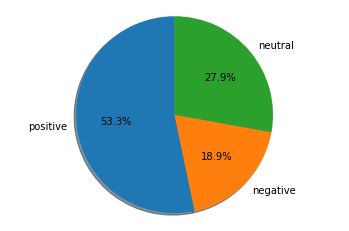

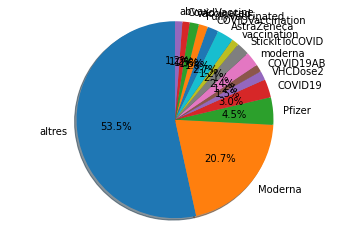

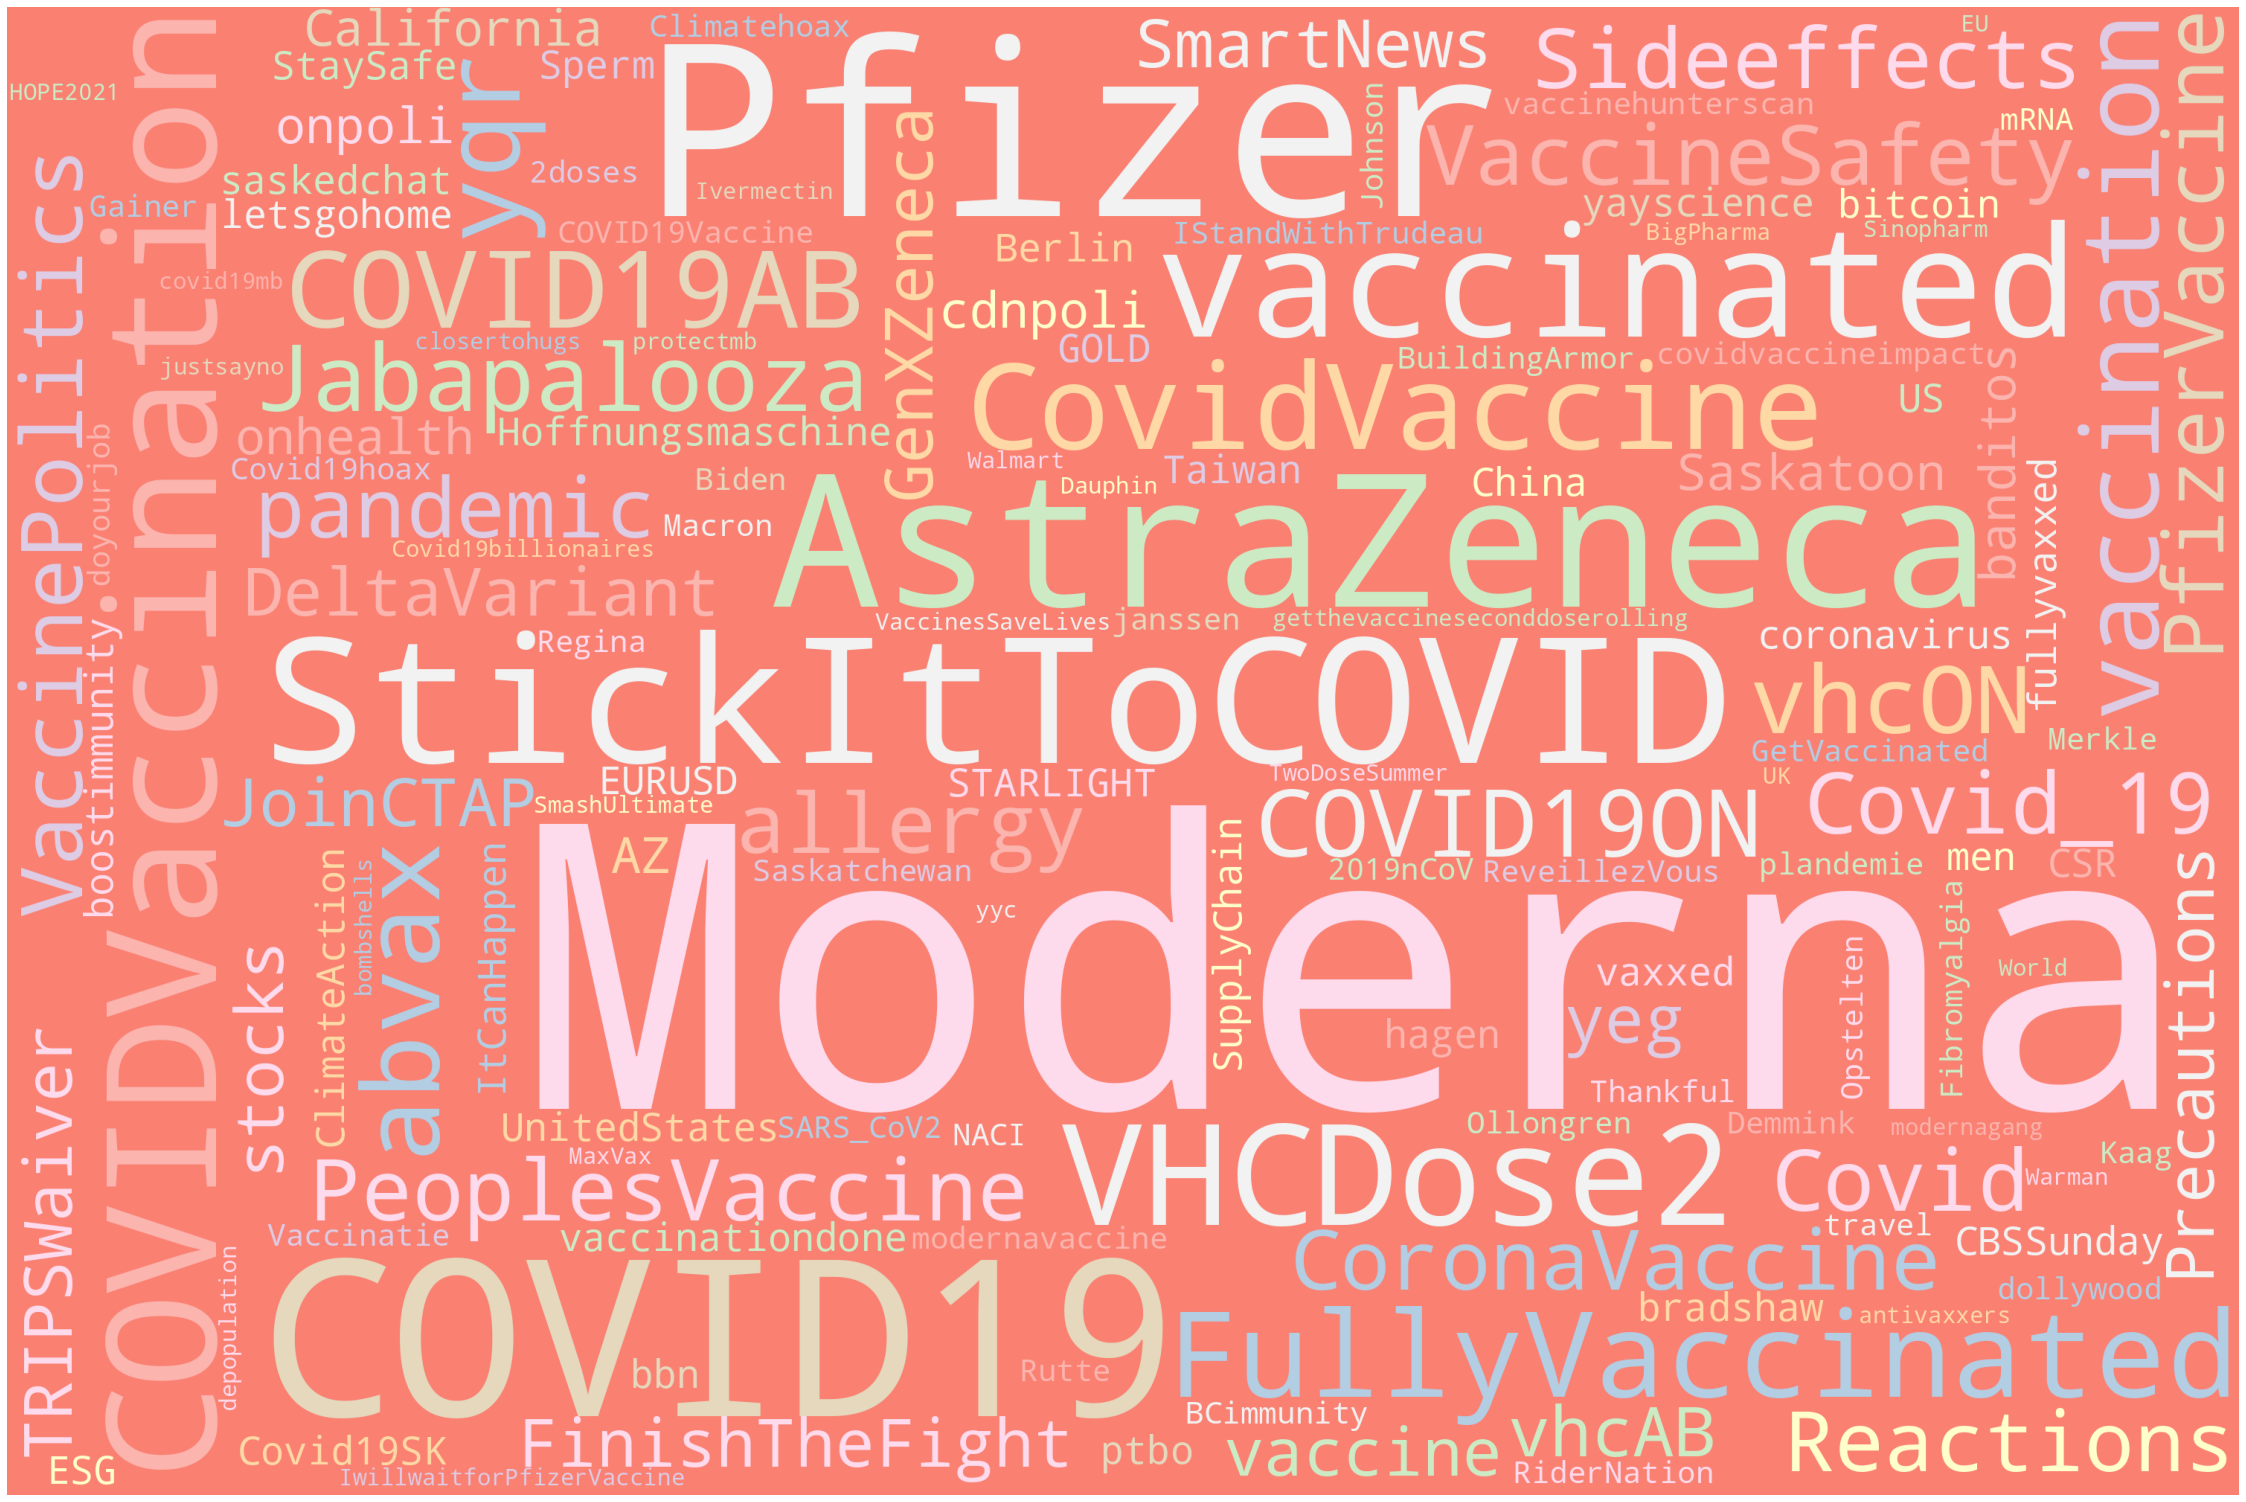

In [14]:
numhash=0
hashdict={}
obj1=storage.get_object('tweetbucket0135711' , 'moderna.csv')
res2=obtenirStringHashtags(obj1)   
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(res2)

mostrar_acceptacio(obj1)
calcularpercent()

plot_cloud(wordcloud)



# Resusltats pfizer

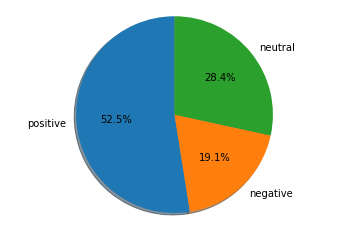

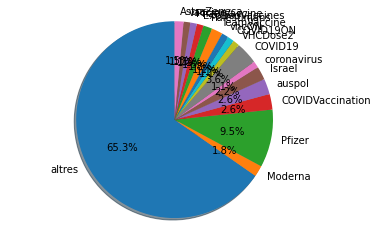

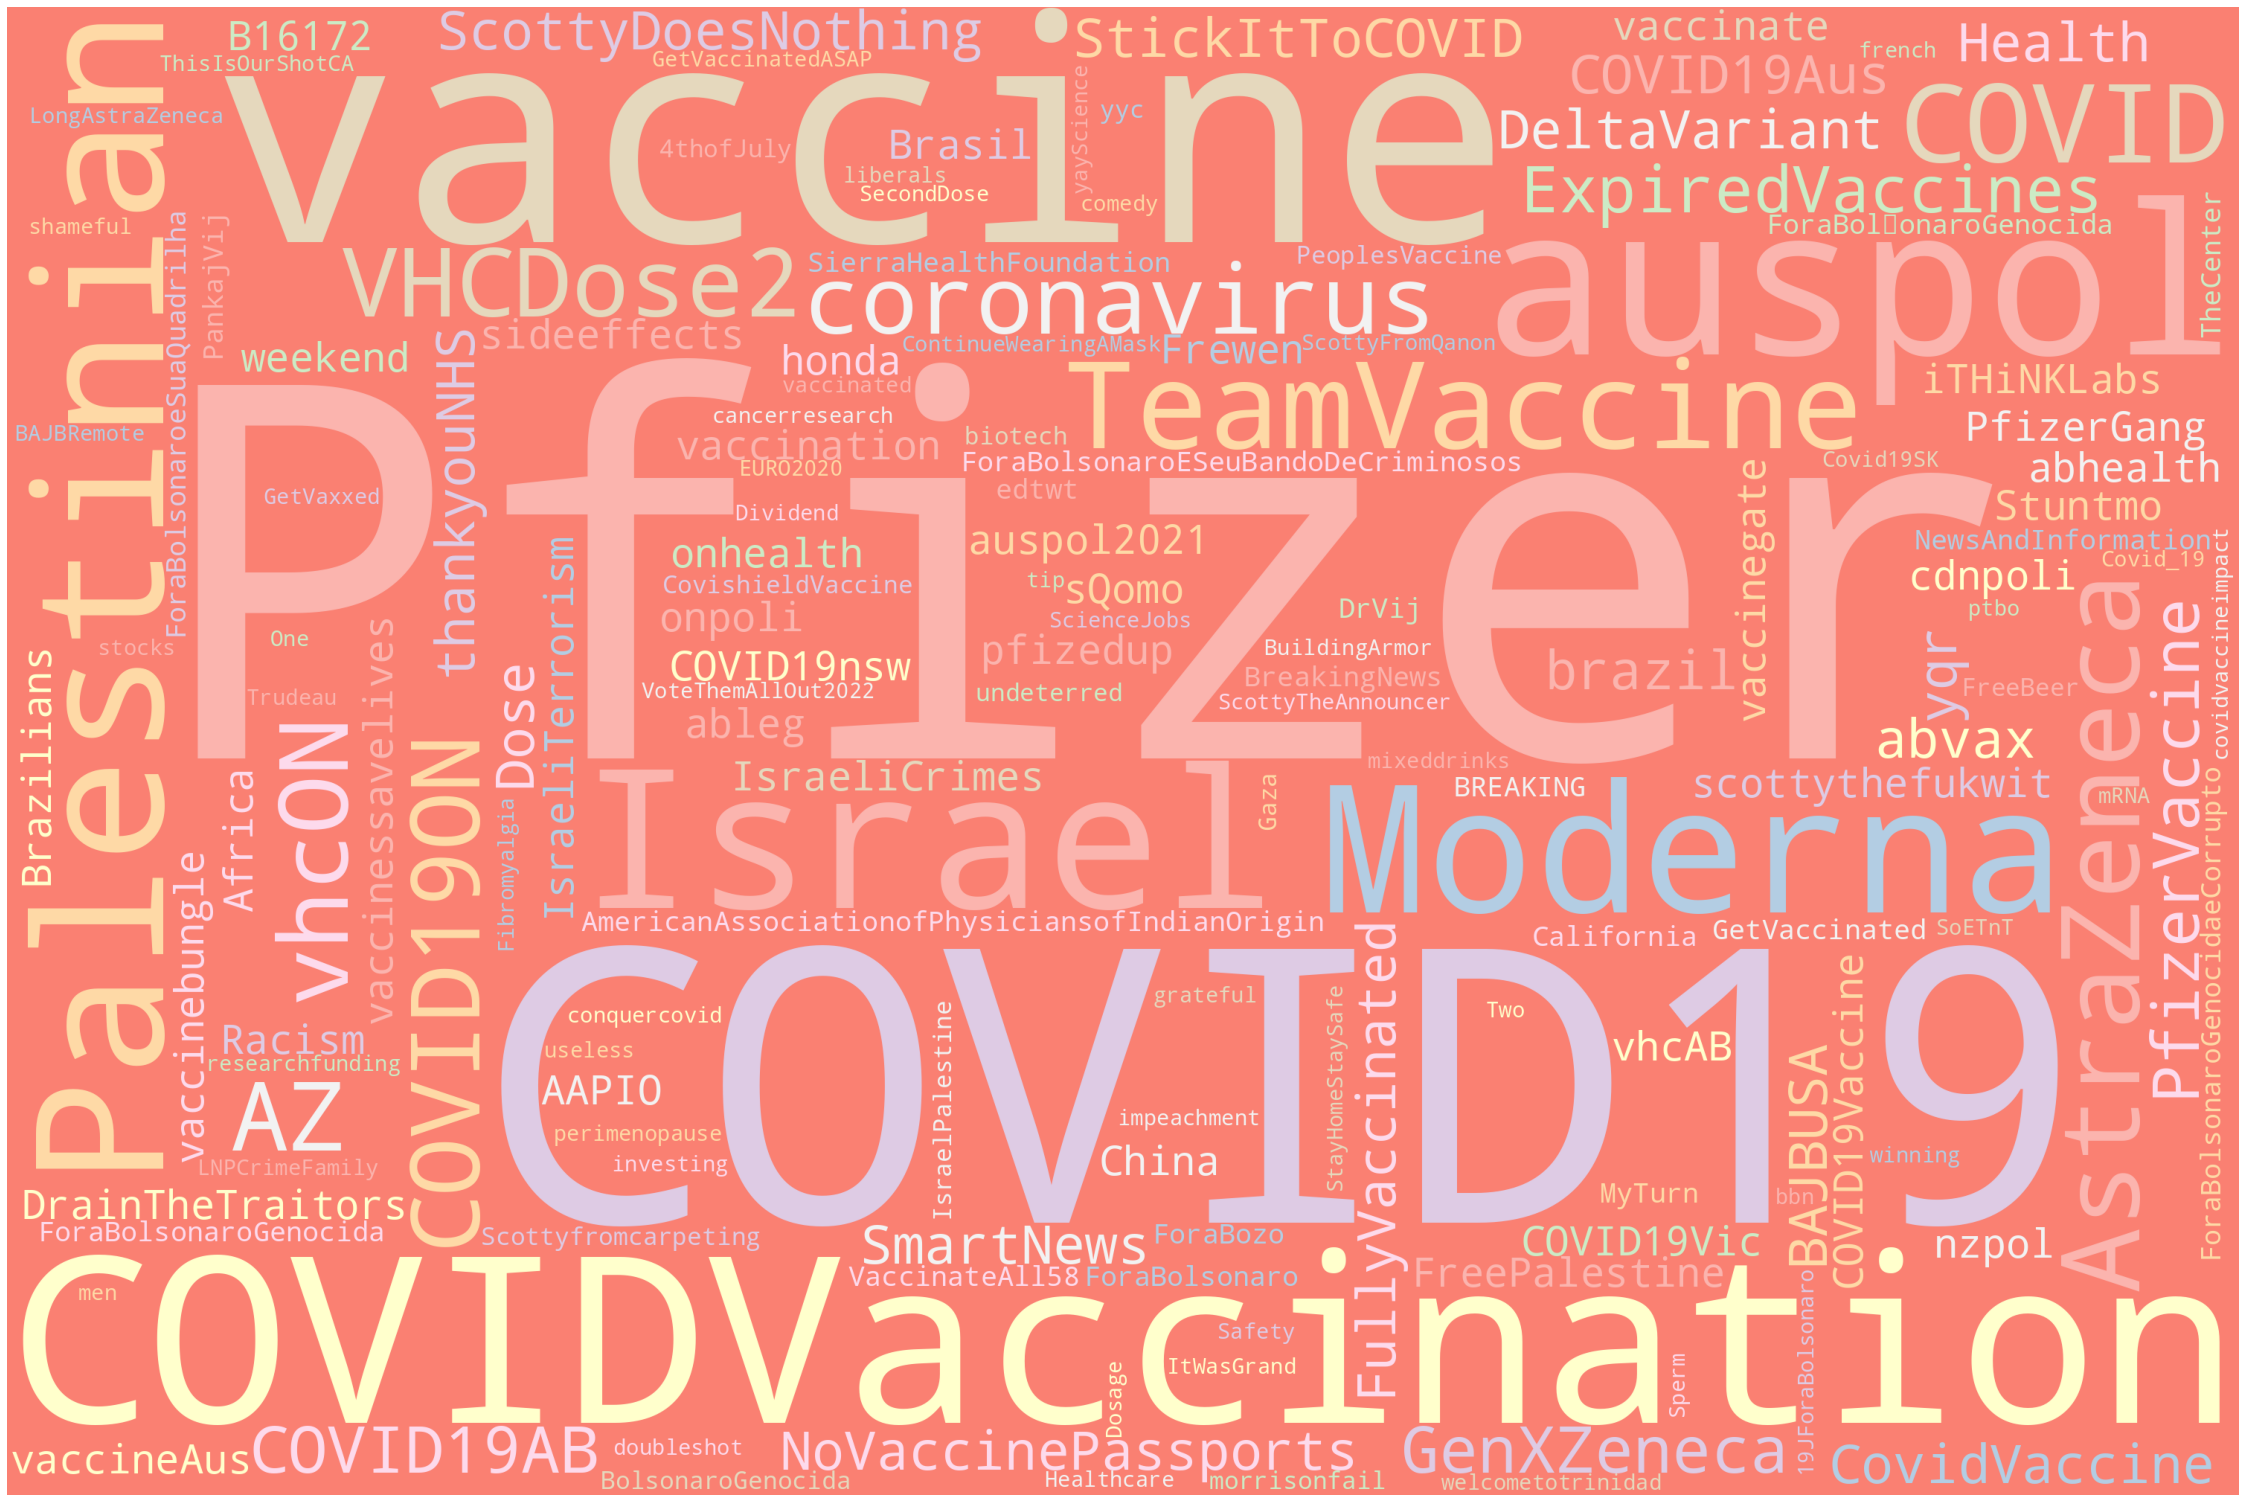

In [29]:
numhash=0
hashdict={}
obj1=storage.get_object('tweetbucket0135711' , 'pfizer.csv')
res2=obtenirStringHashtags(obj1)   
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(res2)

mostrar_acceptacio(obj1)
calcularpercent()

plot_cloud(wordcloud)


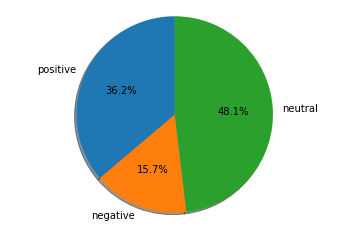

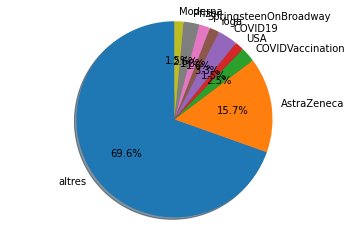

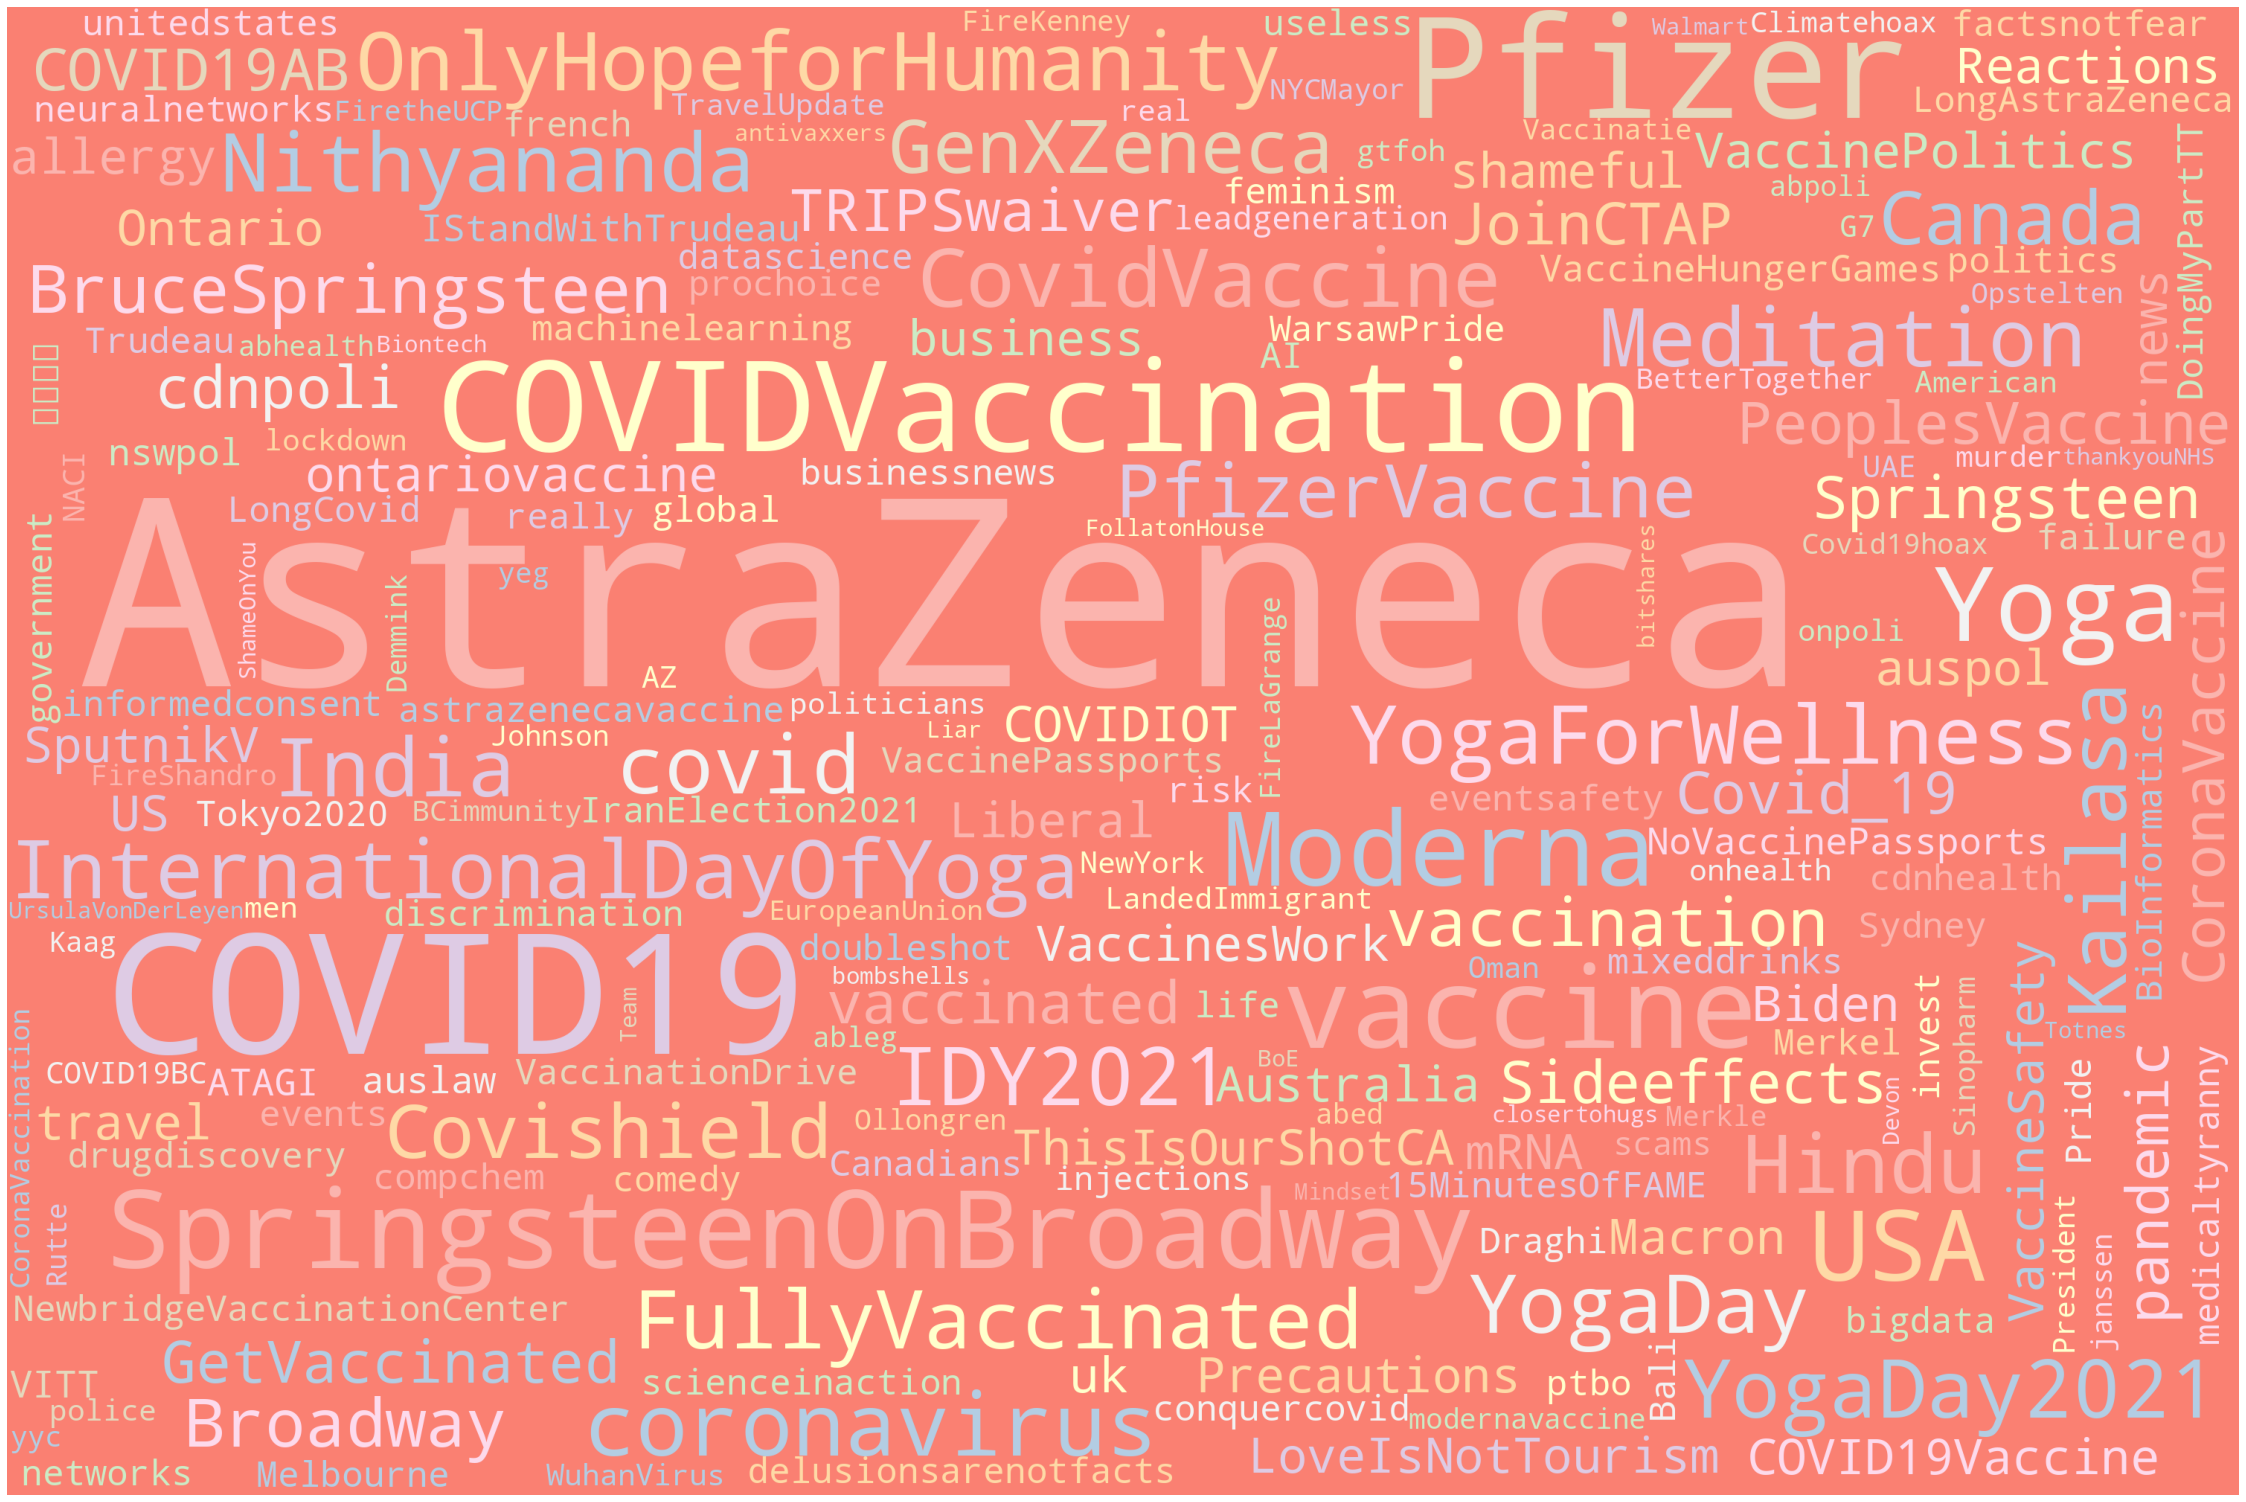

In [16]:
numhash=0
hashdict={}
obj1=storage.get_object('tweetbucket0135711' , 'astrazeneca.csv')
res2=obtenirStringHashtags(obj1)   
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(res2)

mostrar_acceptacio(obj1)
calcularpercent()

plot_cloud(wordcloud)



# Resultats sputnik

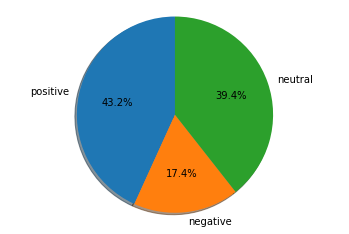

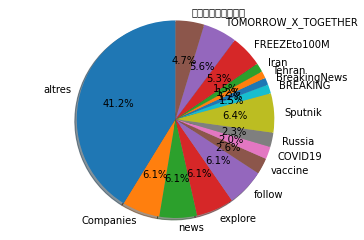

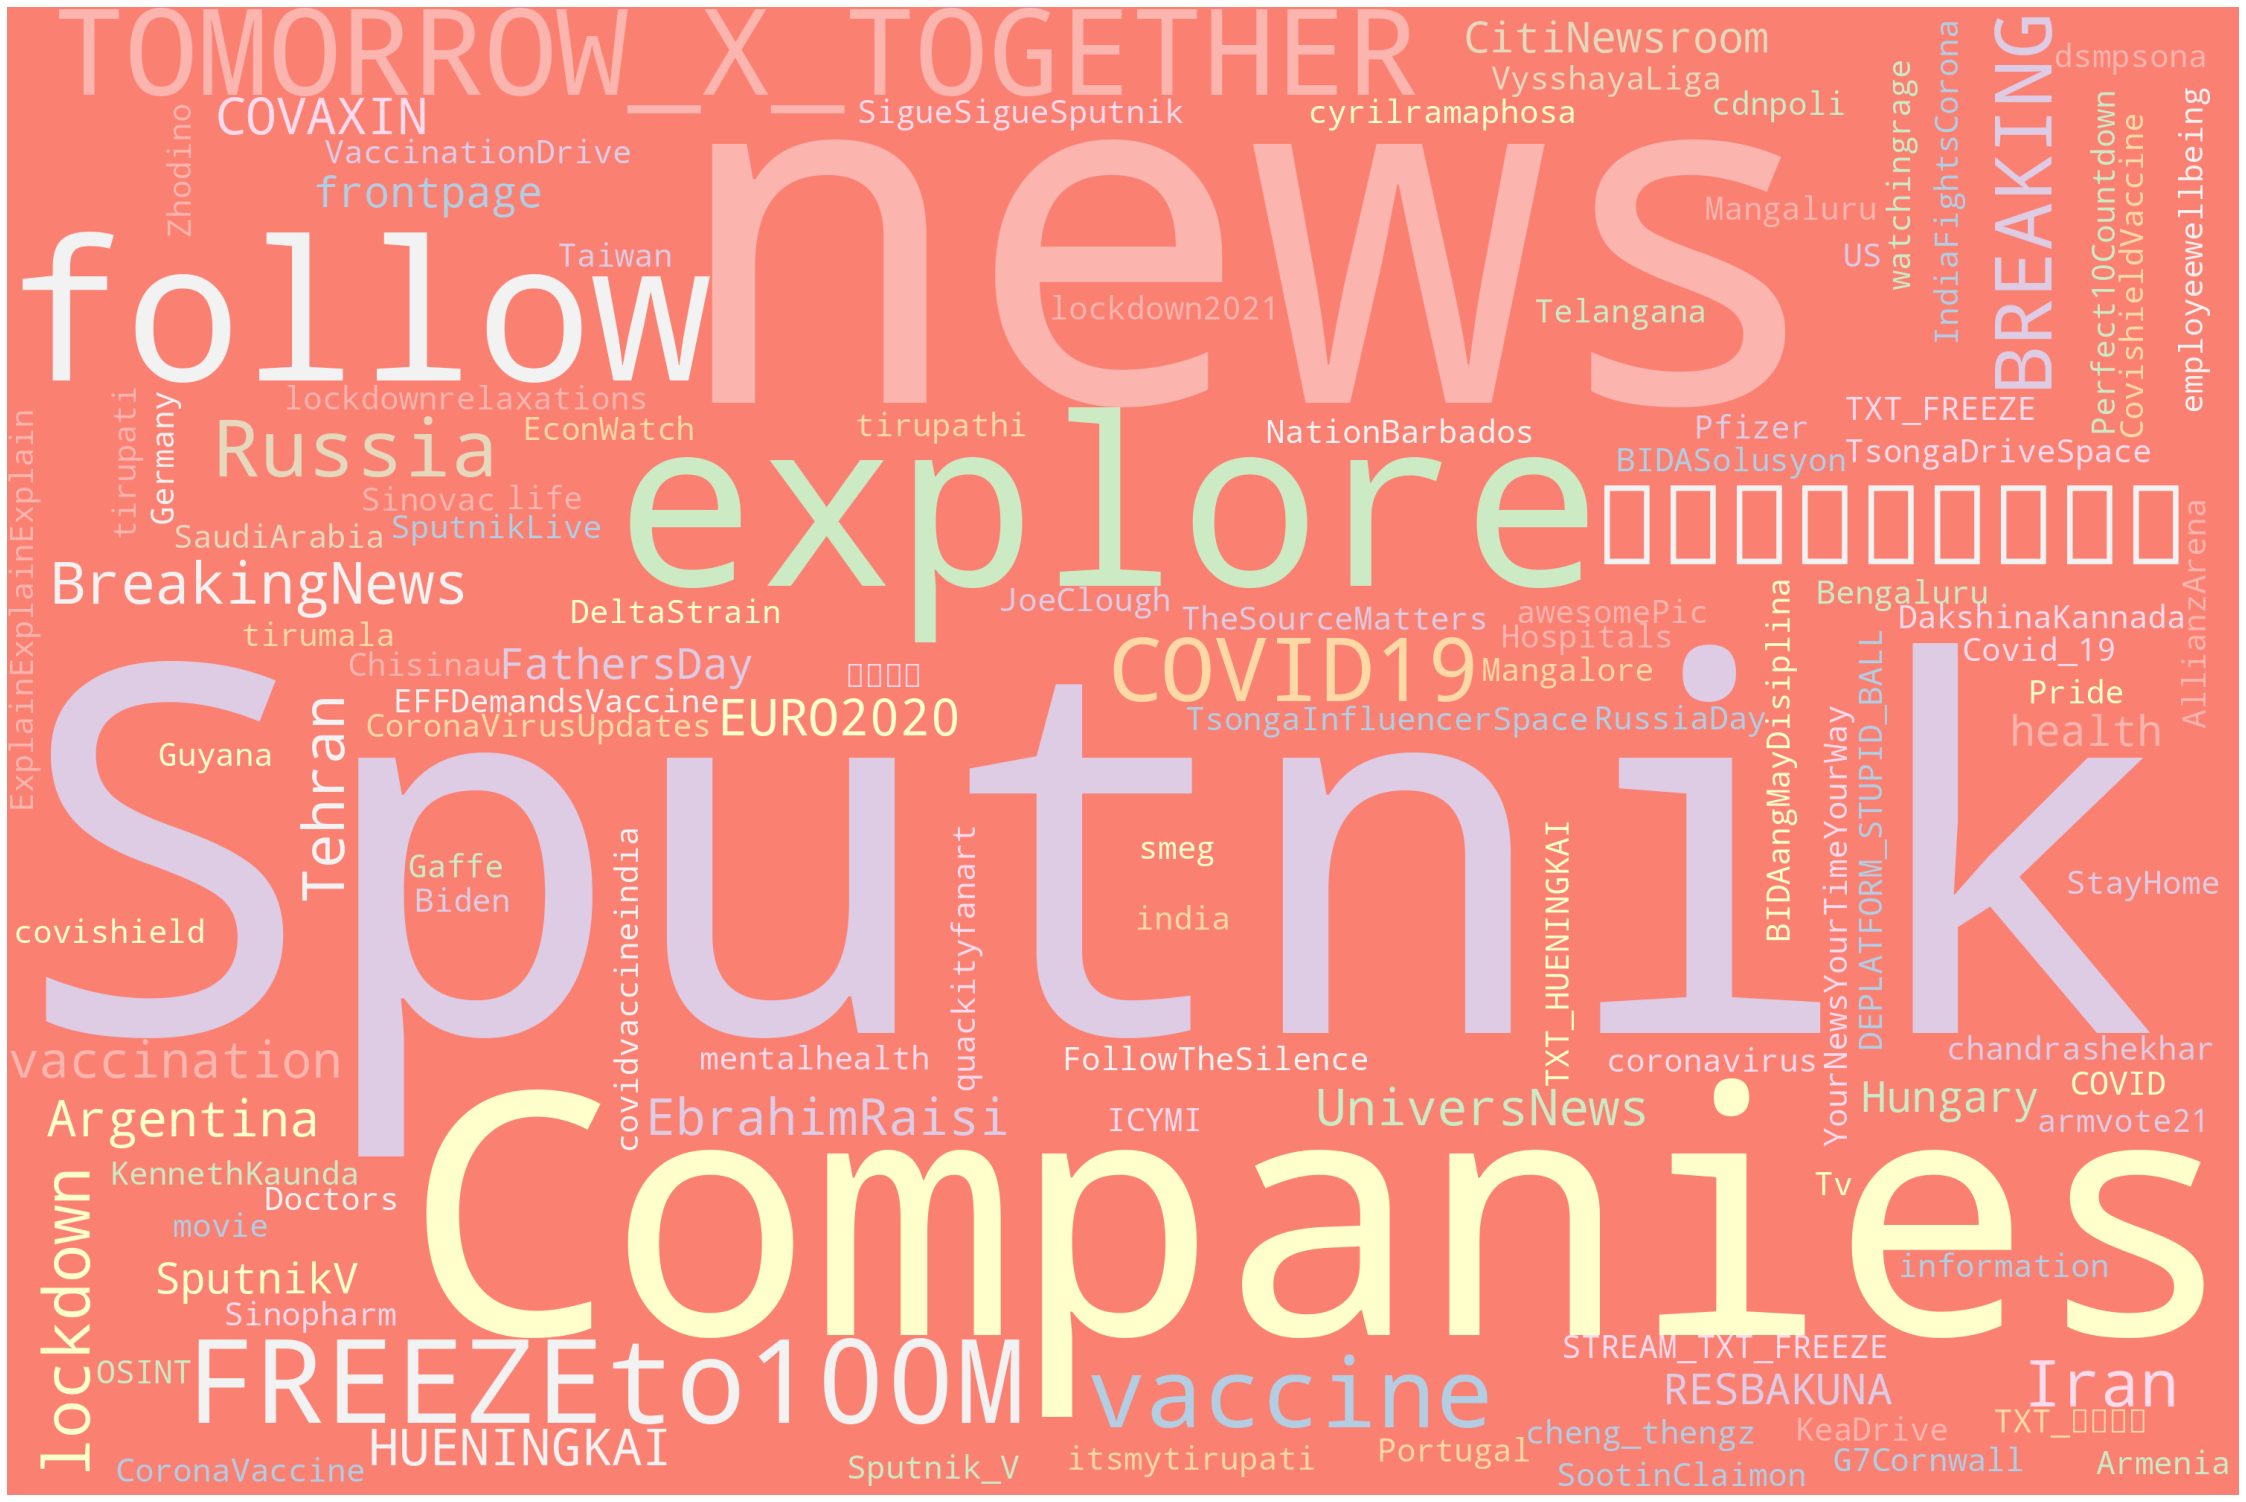

In [19]:
numhash=0
hashdict={}
obj1=storage.get_object('tweetbucket0135711' , 'sputnik.csv')
res2=obtenirStringHashtags(obj1)   
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(res2)

mostrar_acceptacio(obj1)
calcularpercent()

plot_cloud(wordcloud)


# Resultats Coronavac

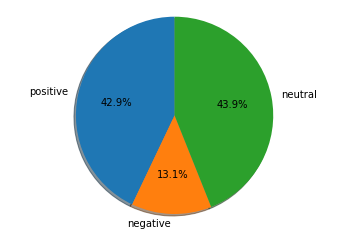

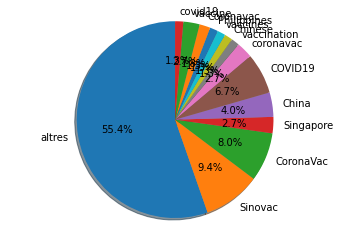

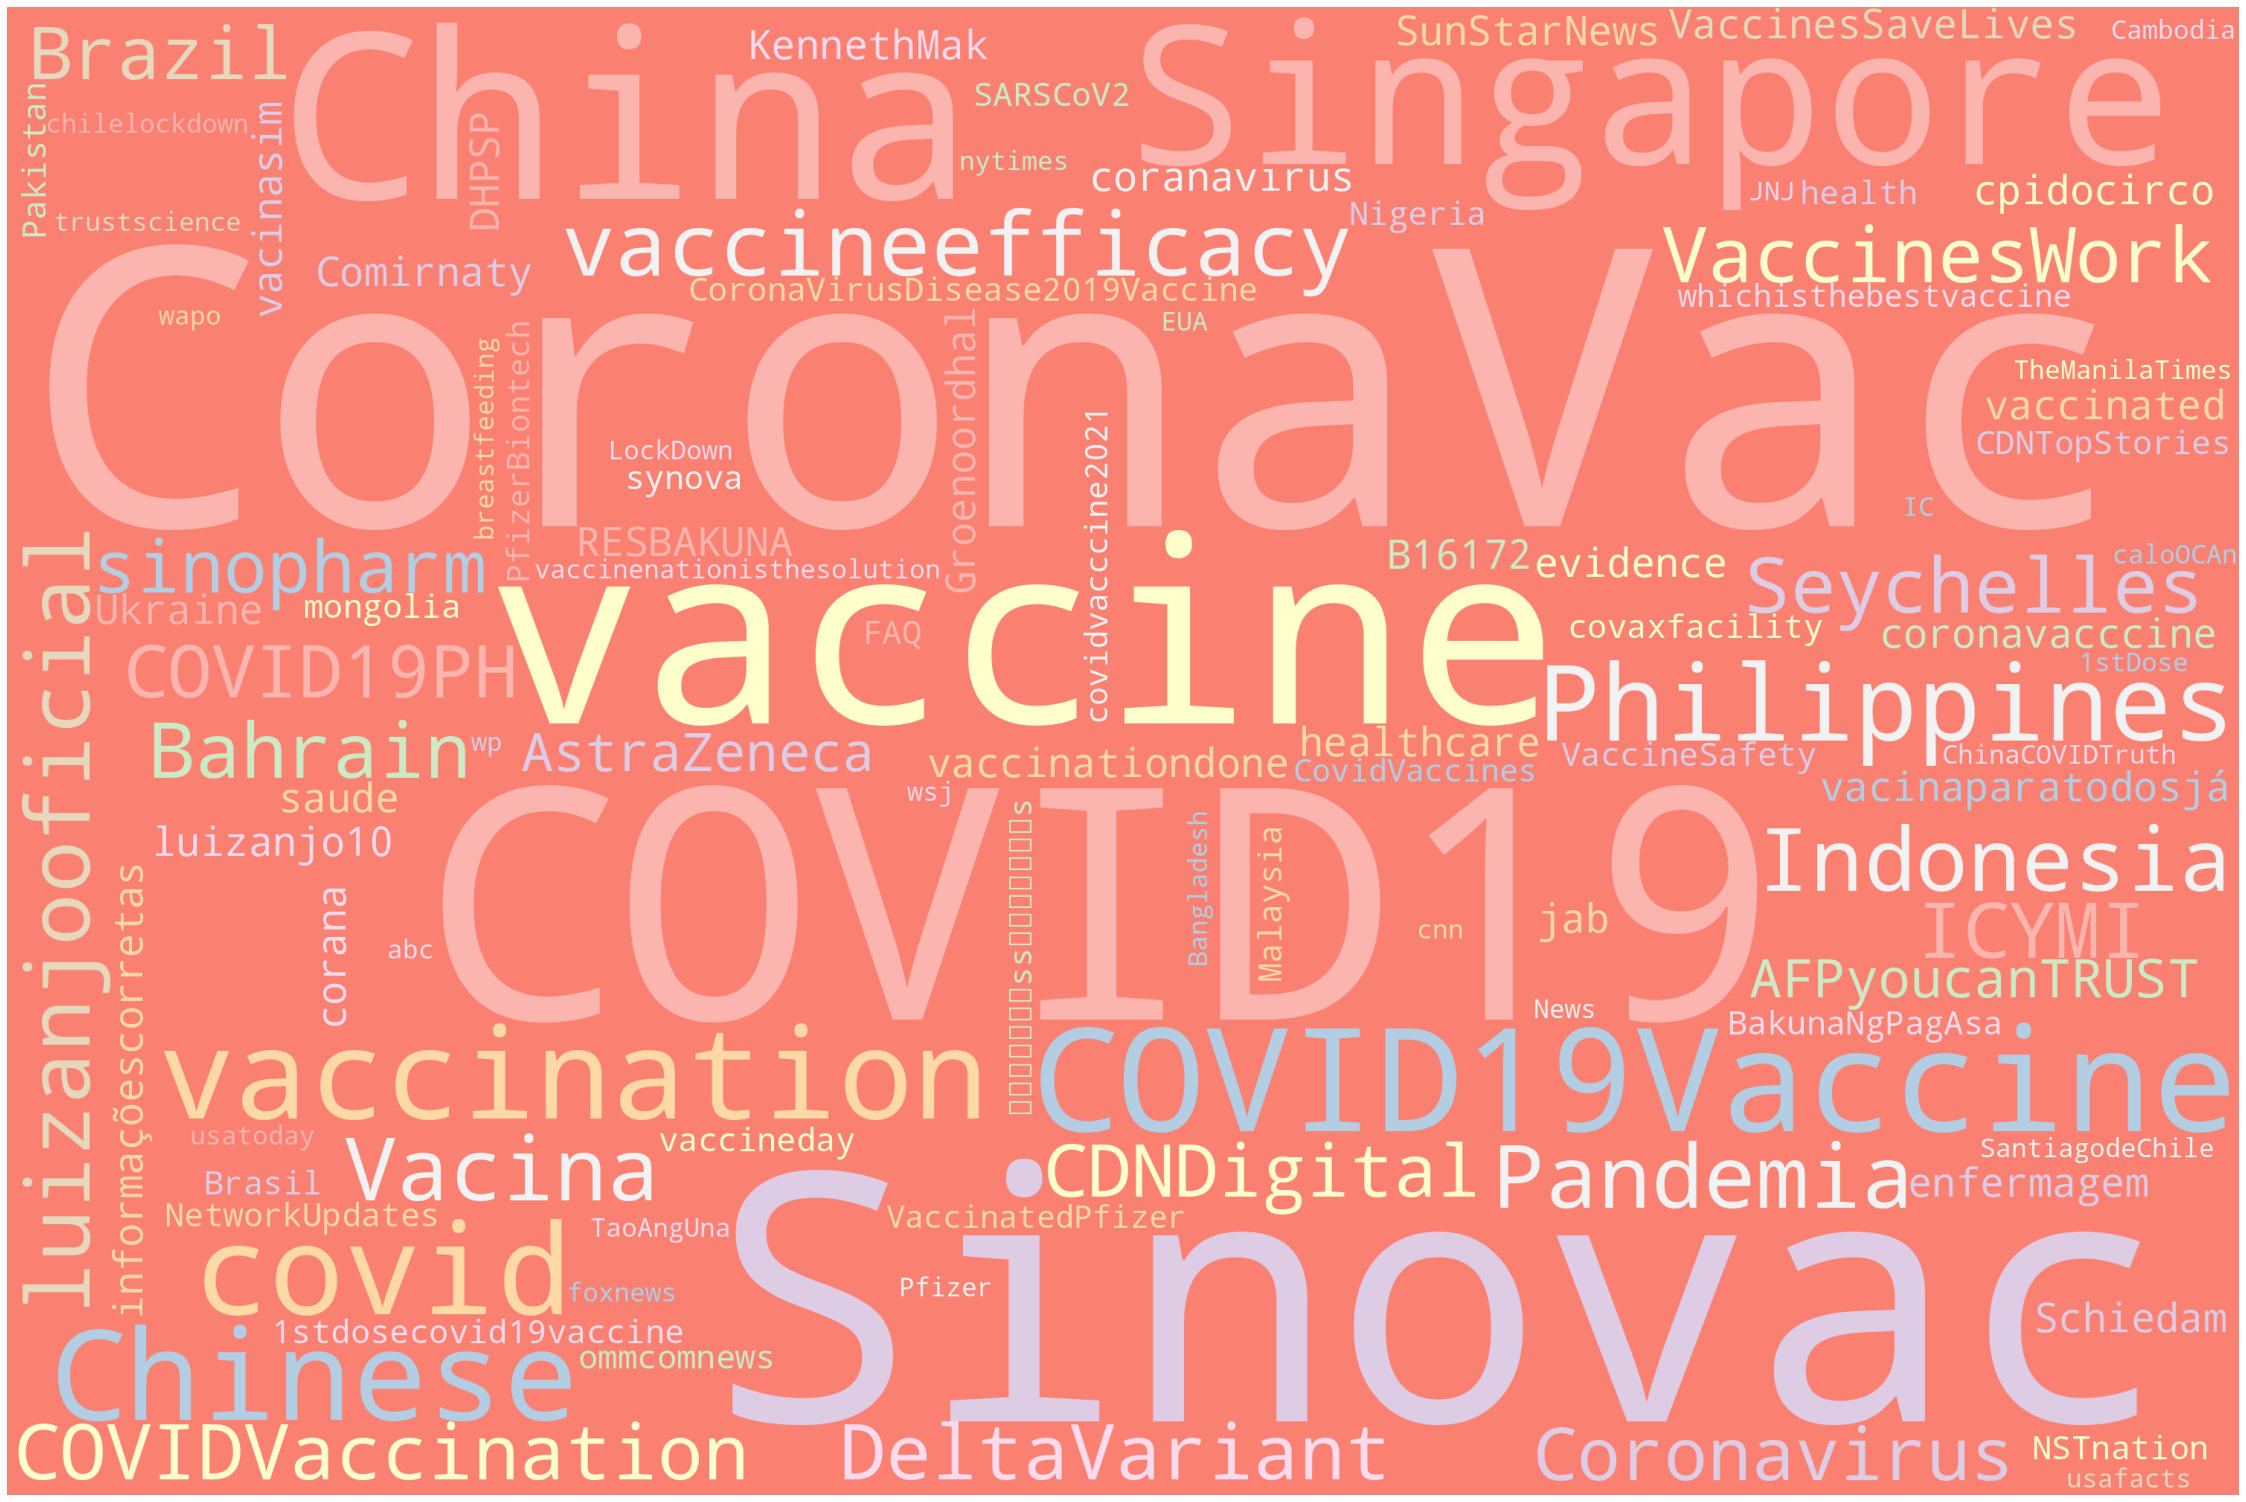

In [18]:
numhash=0
hashdict={}
obj1=storage.get_object('tweetbucket0135711' , 'coronavac.csv')
res2=obtenirStringHashtags(obj1)   
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(res2)

mostrar_acceptacio(obj1)
calcularpercent()

plot_cloud(wordcloud)
